<h1 style="color:red"> T1: Your task is to develop a machine learning model that can predict when and how much water is needed by plants based on temperature and moisture readings. The model should take in temperature and moisture readings as input and output the amount of water needed by the
plant. 
</h1>


<h1> T2: Create 80 Training Dataset and 20 Test Dataset and keep them in separate csv files


<h1> T3: Drive the model by the Test Dataset

In [42]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
df  = pd.read_csv('irrigation.csv')

In [44]:
df.head()

,Date,Avg_Temp_C,Moisture,Water_needed_mL
0,4/1/2023,29,70,100
1,4/2/2023,31,68,120
2,4/3/2023,32,66,130
3,4/4/2023,33,64,140
4,4/5/2023,34,62,150


In [45]:
df.shape

(61, 4)

In [46]:
df.keys()

Index(['Date', 'Avg_Temp_C', 'Moisture', 'Water_needed_mL'], dtype='object')

In [47]:
df.describe()

,Avg_Temp_C,Moisture,Water_needed_mL
count,61.000000,61.000000,61.000000
mean,31.606557,65.491803,125.245902
std,1.584074,3.334781,15.341290
min,28.000000,60.000000,100.000000
25%,31.000000,62.000000,120.000000
50%,32.000000,66.000000,130.000000
75%,33.000000,68.000000,140.000000
max,35.000000,70.000000,150.000000


Date               0
Avg_Temp_C         0
Moisture           0
Water_needed_mL    0
dtype: int64

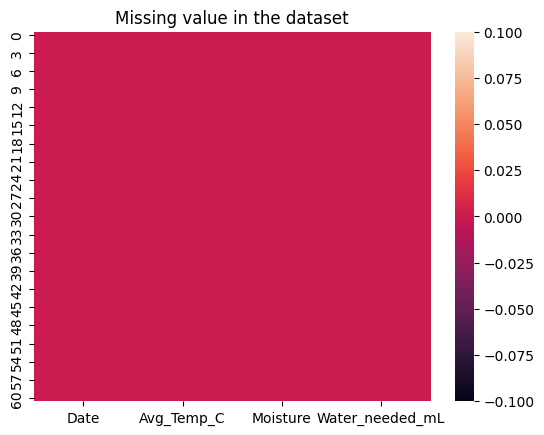

In [48]:
plt.figure()
sns.heatmap(df.isnull())
plt.title('Missing value in the dataset');
df.isnull().sum()

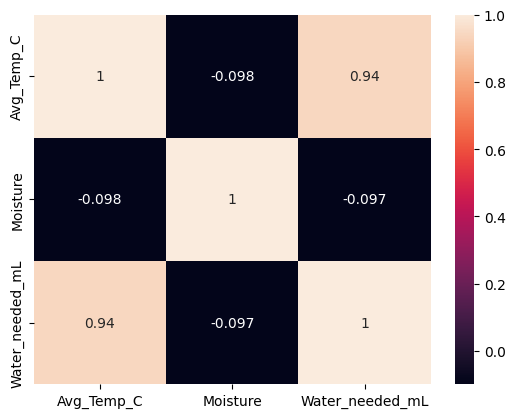

In [49]:
# correlation plot
corr = df.corr()
sns.heatmap(corr, annot= True);

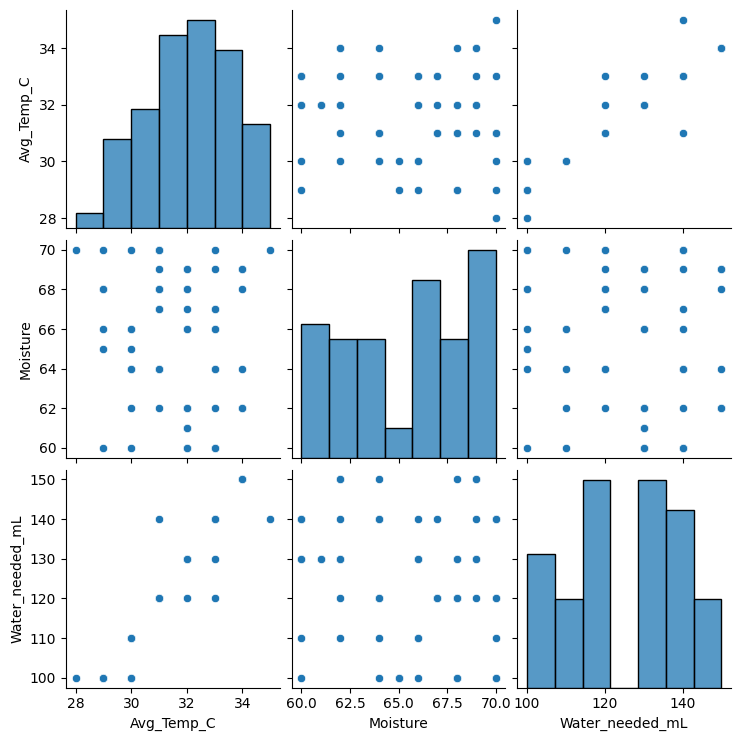

In [50]:
sns.pairplot(df)

In [51]:
old_skew = df.skew().sort_values(ascending=False)
old_skew

<ipython-input-51-a8bedec22a6c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  old_skew = df.skew().sort_values(ascending=False)


Avg_Temp_C        -0.149899
Water_needed_mL   -0.176787
Moisture          -0.265648
dtype: float64

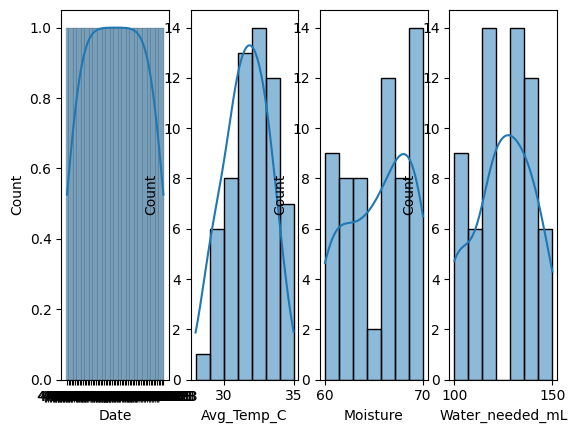

In [52]:
plt.figure()
for i in list(enumerate(df.columns)):
    plt.subplot(1, 4, i[0]+1)
    sns.histplot(data = df[i[1]], kde=True) 

Text(0.5, 1.0, 'Day vs Temperature')

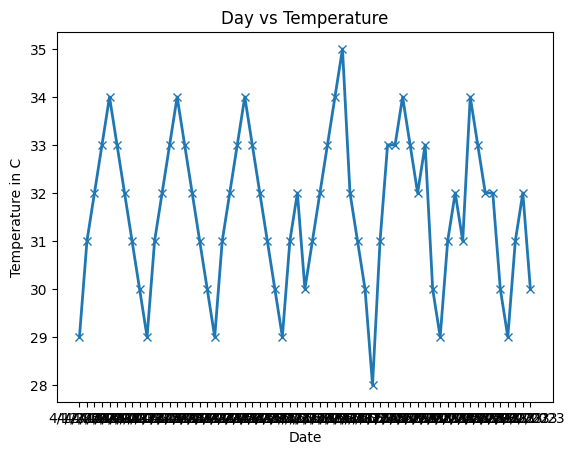

In [53]:
plt.figure()
plt.plot(df['Date'],df['Avg_Temp_C'],linewidth=2, marker ='x')
plt.xlabel('Date')
plt.ylabel('Temperature in C')
plt.title('Day vs Temperature')

Text(0.5, 1.0, 'Day vs Temperature')

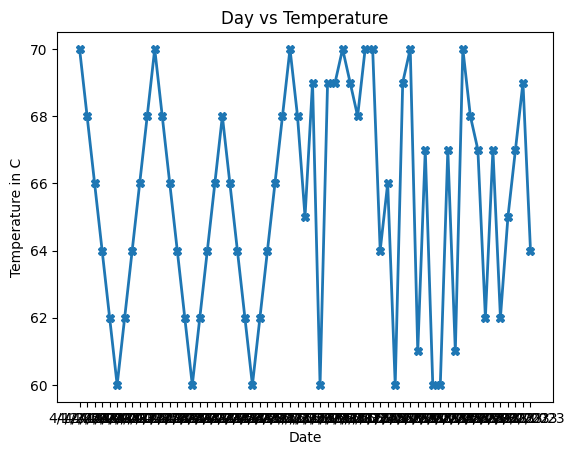

In [54]:
plt.figure()
plt.plot(df['Date'],df['Moisture'],linewidth=2, marker ='X')
plt.xlabel('Date')
plt.ylabel('Temperature in C')
plt.title('Day vs Temperature')

In [55]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = df.drop(['Date','Water_needed_mL'],axis=1) 
y = df[['Water_needed_mL']] 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23)

X_train.to_csv('train.csv',index=False)
X_test.to_csv('test.csv',index=False)

In [56]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((48, 2), (48, 1), (13, 2), (13, 1))

In [57]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [58]:
print("Intercept for the model is", lin_reg.intercept_, "and the scope is",lin_reg.coef_)

Intercept for the model is [-151.66100869] and the scope is [[ 8.8164878 -0.0247007]]


In [59]:
# sklearn regression module
y_pred = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse = mean_squared_error(y_pred, y_test)

# R_square
R_square = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for scikit learn library is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  12.54072542586518
R square obtain for scikit learn library is : 0.9472790398763379


In [60]:
print(f'Training set score:: {lin_reg.score(X_train,y_train)}')
print(f'Test set score:: {lin_reg.score(X_test,y_test)}')

Training set score:: 0.8691017449030719
Test set score:: 0.9472790398763379


In [61]:
x_surf, y_surf = np.meshgrid(np.linspace(df.Avg_Temp_C.min(), df.Avg_Temp_C.max(), 100),np.linspace(df.Moisture.min(), df.Moisture.max(), 100))
onlyX = pd.DataFrame({'Avg_Temp_C': x_surf.ravel(), 'Moisture': y_surf.ravel()})
fittedY=lin_reg.predict(onlyX)

In [62]:
fittedY=np.array(fittedY)


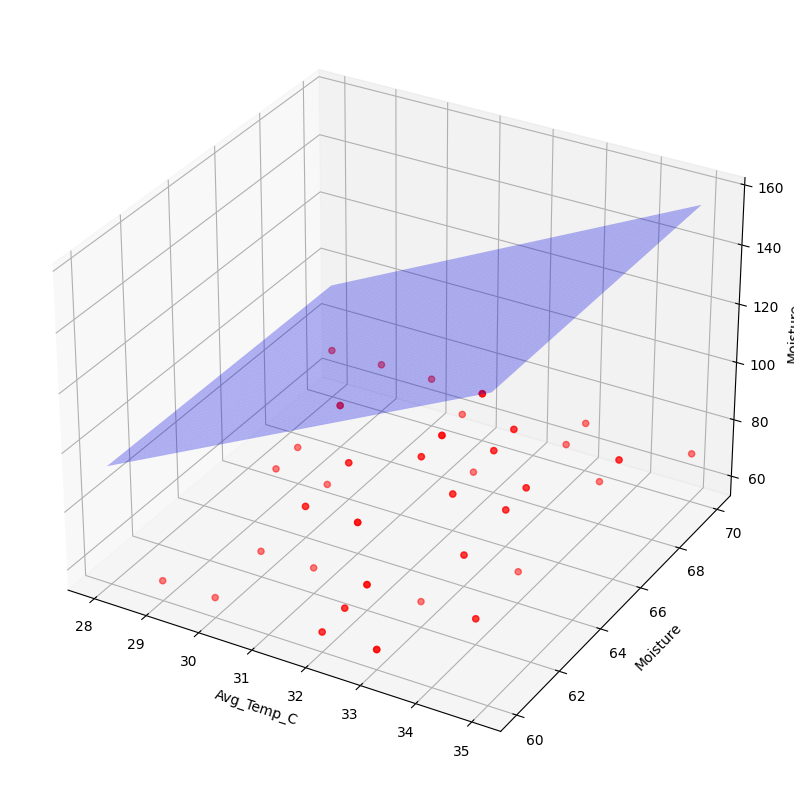

In [63]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Avg_Temp_C'],df['Moisture'],df['Moisture'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('Avg_Temp_C')
ax.set_ylabel('Moisture')
ax.set_zlabel('Moisture')
plt.show()

In [72]:
# input = [[int(input()) for x in range (2)] for y in range(1)]

In [73]:
lin_reg.predict([[34,70]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[146.37052755]])

<h1> Decision tree regression

In [30]:
from sklearn.tree import DecisionTreeRegressor
dtr= DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [31]:
y_pred_dtr = dtr.predict(X_test)

In [33]:
mean_squared_error(y_pred_dtr,y_test)

9.615384615384615

In [35]:
y_pred_train = dtr.predict(X_train)

In [36]:
mean_squared_error(y_pred_train,y_train)

10.416666666666666

In [37]:
print(f'Training set score:: {dtr.score(X_train,y_train)}')
print(f'Test set score:: {dtr.score(X_test,y_test)}')

Training set score:: 0.9532619279454723
Test set score:: 0.9595771144278606


In [74]:
dtr.predict([[34,70]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([140.])